In [1]:
# load the required libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re
import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
#import pip
#pip.main(['install','seaborn'])

In [4]:
productname = [] 
price = []
rating = []
features = []
# go throught the 23 pages
for i in range(1,22): 
    start_time = time.time()
    URL = 'https://www.flipkart.com/televisions/pr?sid=ckf%2Cczl&p%5B%5D=facets.screen_size%255B%255D%3D48%2B-%2B55%2Binch&param=1&wid=7.productCard.PMU_V2_5&page={}'.format(i)
    page = requests.get(URL)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)

    for x in soup.find_all('div', attrs={'class':'_3pLy-c row'}):
        pname = x.find('div', attrs = {'class':'_4rR01T'})
        cost = x.find('div', attrs = {'class':'_30jeq3 _1_WHN1'})
        ratings = x.find('div', attrs = {'class':'_3LWZlK'})
        specs = x.find('div', attrs = {'class':'fMghEO'})
        
        if pname is None:
            productname.append(np.NaN)
        else:
            productname.append(pname.text)
            
        if cost is None:
            price.append(np.NaN)
        else:
            price.append(cost.text)
            
        if ratings is None:
            rating.append(np.NaN)
        else:
            rating.append(ratings.text)
            
        if specs is None:
            features.append(np.NaN)
        else:
            features.append(specs.text)
            
     
    print('Finished')

Finished
Finished
Finished
Finished
Finished
Finished
Finished
Finished
Finished
Finished
Finished
Finished
Finished
Finished
Finished
Finished
Finished
Finished
Finished
Finished
Finished


In [5]:
len(productname)
len(price)
len(rating)
len(features)

135

135

135

135

In [6]:
Tv_df = pd.DataFrame({'ProductName':productname, 'Price':price, 'Rating': rating, 'Features':features})

In [7]:
Tv_df

,ProductName,Price,Rating,Features
0,SAMSUNG The Frame 2021 Series 138 cm (55 inch)...,"₹88,990",4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
1,SAMSUNG The Frame 2021 Series 125 cm (50 inch)...,"₹73,990",4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
2,Mi 5X 125.7 cm (50 inch) Ultra HD (4K) LED Sma...,"₹40,999",4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
3,Mi 5X 138.8 cm (55 inch) Ultra HD (4K) LED Sma...,"₹46,999",4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
4,OnePlus U1S 126 cm (50 inch) Ultra HD (4K) LED...,"₹42,999",4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
...,...,...,...,...
130,Panasonic VIERA 50 Inches HD Plasma TH-P50X30D,"₹65,900",4.5,HD Ready 1024 x 768 Pixels20 W Speaker Output3...
131,Power Guard 140 cm (55 inch) Ultra HD (4K) LED...,"₹41,999",NaN,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
132,Power Guard 124 cm (49 inch) Ultra HD (4K) LED...,"₹34,900",NaN,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
133,VG 126 cm (50 inch) Ultra HD (4K) LED Smart TV,"₹12,990",NaN,Netflix|Disney+Hotstar|YoutubeOperating System...


Pickiling 
 In real world sceanario, the use pickling and unpickling are widespread as they allow us to easily transfer data from one server/system to another and then store it in a file or database.

In [8]:
#Tv_df.to_csv('https://d.docs.live.net/3cb31c4f8a61a346/Documents/Television_file.xlsx')

# Exploratory Data Analysis

In [9]:
Tv_df.head()

,ProductName,Price,Rating,Features
0,SAMSUNG The Frame 2021 Series 138 cm (55 inch)...,"₹88,990",4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
1,SAMSUNG The Frame 2021 Series 125 cm (50 inch)...,"₹73,990",4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
2,Mi 5X 125.7 cm (50 inch) Ultra HD (4K) LED Sma...,"₹40,999",4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
3,Mi 5X 138.8 cm (55 inch) Ultra HD (4K) LED Sma...,"₹46,999",4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
4,OnePlus U1S 126 cm (50 inch) Ultra HD (4K) LED...,"₹42,999",4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...


In [10]:
Tv_df['Features'][0]

'Netflix|Prime Video|Disney+Hotstar|YoutubeOperating System: TizenUltra HD (4K) 3840 x 2160 Pixels40 W Speaker Output120 Hz Refresh Rate4 x HDMI | 2 x USB1 Year Product Warranty and 1 Year Additional on Panel'

In [11]:
re.findall("System: (.*?)\s", Tv_df['Features'][0])

['TizenUltra']

The use of lambda :
https://geohernandez.net/python-lambda-and-regex-a-good-team-for-replacing-a-string-using-dictionaries/

In [185]:
#Operating system
Os_reg = r'System: (.*?)U'
Tv_df['OperatingSystem']= Tv_df['Features'].apply(lambda x:re.compile(Os_reg).findall(x))
Tv_df.head()

,ProductName,Price,Rating,Features,OperatingnSystem,OTT,Video_resolution,Type,Ref_rate,Screen_size,Brand,OperatingSystem,OS_new
0,SAMSUNG The Frame 2021 Series 138 cm (55 inch)...,88990,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Tizen],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],[120 Hz],"[ 138 cm, 55 inch]",SAMSUNG,[Tizen],Tizen
1,SAMSUNG The Frame 2021 Series 125 cm (50 inch)...,73990,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Tizen],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],[60 Hz],"[ 125 cm, 50 inch]",SAMSUNG,[Tizen],Tizen
2,Mi 5X 125.7 cm (50 inch) Ultra HD (4K) LED Sma...,40999,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],[60 Hz],"[ 125.7 cm, 50 inch]",Mi,[Android],Android
3,Mi 5X 138.8 cm (55 inch) Ultra HD (4K) LED Sma...,46999,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],[60 Hz],"[ 138.8 cm, 55 inch]",Mi,[Android],Android
4,OnePlus U1S 126 cm (50 inch) Ultra HD (4K) LED...,42999,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],[60 Hz],"[ 126 cm, 50 inch]",OnePlus,[Android],Android


In [210]:
Tv_df.drop('OperatingnSystem',axis=1)

,ProductName,Price,Rating,Features,OTT,Video_resolution,Type,Ref_rate,Screen_size,Brand,OperatingSystem,OS_new
0,SAMSUNG The Frame 2021 Series 138 cm (55 inch)...,88990,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),120 Hz,138 cm55 inch,SAMSUNG,Tizen,Tizen
1,SAMSUNG The Frame 2021 Series 125 cm (50 inch)...,73990,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),60 Hz,125 cm50 inch,SAMSUNG,Tizen,Tizen
2,Mi 5X 125.7 cm (50 inch) Ultra HD (4K) LED Sma...,40999,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),60 Hz,125.7 cm50 inch,Mi,Android,Android
3,Mi 5X 138.8 cm (55 inch) Ultra HD (4K) LED Sma...,46999,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),60 Hz,138.8 cm55 inch,Mi,Android,Android
4,OnePlus U1S 126 cm (50 inch) Ultra HD (4K) LED...,42999,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),60 Hz,126 cm50 inch,OnePlus,Android,Android
...,...,...,...,...,...,...,...,...,...,...,...,...
130,Panasonic VIERA 50 Inches HD Plasma TH-P50X30D,65900,4.5,HD Ready 1024 x 768 Pixels20 W Speaker Output3...,[HD Ready 1024 x 768 Pixels20 W Speaker ],1024 x 768 Pixels,,,,Panasonic,,
131,Power Guard 140 cm (55 inch) Ultra HD (4K) LED...,41999,NaN,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),60 Hz,140 cm55 inch,Power,Android,Android
132,Power Guard 124 cm (49 inch) Ultra HD (4K) LED...,34900,NaN,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),60 Hz,124 cm49 inch,Power,Android,Android
133,VG 126 cm (50 inch) Ultra HD (4K) LED Smart TV,12990,NaN,Netflix|Disney+Hotstar|YoutubeOperating System...,[Netflix|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),60 Hz,126 cm50 inch,VG,Android Based,Android


In [211]:
#OTT platforms
Ott_plat = r'^(\w.*?)O|U$'
#Ott_plat
#Ott_platforms=(*Ott_plat,)

In [212]:
re.findall( r'^(\w.*?)O|U$', Tv_df['Features'][1])

['Netflix|Prime Video|Disney+Hotstar|Youtube']

In [213]:
Tv_df['OTT'] = Tv_df['Features'].apply(lambda x:re.compile(Ott_plat).findall(x))
Tv_df.head()

,ProductName,Price,Rating,Features,OperatingnSystem,OTT,Video_resolution,Type,Ref_rate,Screen_size,Brand,OperatingSystem,OS_new
0,SAMSUNG The Frame 2021 Series 138 cm (55 inch)...,88990,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Tizen],[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),120 Hz,138 cm55 inch,SAMSUNG,Tizen,Tizen
1,SAMSUNG The Frame 2021 Series 125 cm (50 inch)...,73990,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Tizen],[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),60 Hz,125 cm50 inch,SAMSUNG,Tizen,Tizen
2,Mi 5X 125.7 cm (50 inch) Ultra HD (4K) LED Sma...,40999,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),60 Hz,125.7 cm50 inch,Mi,Android,Android
3,Mi 5X 138.8 cm (55 inch) Ultra HD (4K) LED Sma...,46999,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),60 Hz,138.8 cm55 inch,Mi,Android,Android
4,OnePlus U1S 126 cm (50 inch) Ultra HD (4K) LED...,42999,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),60 Hz,126 cm50 inch,OnePlus,Android,Android


In [214]:
#Video resolution
regx = r'\d+\sx\s+[0-9]+\sPixels'

In [215]:
re.findall(r'\d+\sx\s+[0-9]+\sPixels', Tv_df['Features'][1])

['3840 x 2160 Pixels']

In [216]:
Tv_df['Video_resolution'] = Tv_df['Features'].apply(lambda x:re.compile(regx).findall(x))
Tv_df.head()

,ProductName,Price,Rating,Features,OperatingnSystem,OTT,Video_resolution,Type,Ref_rate,Screen_size,Brand,OperatingSystem,OS_new
0,SAMSUNG The Frame 2021 Series 138 cm (55 inch)...,88990,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Tizen],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],Ultra HD (4K),120 Hz,138 cm55 inch,SAMSUNG,Tizen,Tizen
1,SAMSUNG The Frame 2021 Series 125 cm (50 inch)...,73990,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Tizen],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],Ultra HD (4K),60 Hz,125 cm50 inch,SAMSUNG,Tizen,Tizen
2,Mi 5X 125.7 cm (50 inch) Ultra HD (4K) LED Sma...,40999,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],Ultra HD (4K),60 Hz,125.7 cm50 inch,Mi,Android,Android
3,Mi 5X 138.8 cm (55 inch) Ultra HD (4K) LED Sma...,46999,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],Ultra HD (4K),60 Hz,138.8 cm55 inch,Mi,Android,Android
4,OnePlus U1S 126 cm (50 inch) Ultra HD (4K) LED...,42999,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],Ultra HD (4K),60 Hz,126 cm50 inch,OnePlus,Android,Android


In [217]:
#type
rege = r'[A-Z][a-z]+\s(?:HD|SD)\s\(.+?\)'
re.findall(r'[A-Z][a-z]+\s(?:HD|SD)\s\(.+?\)', Tv_df['Features'][1])
Tv_df['Type'] = Tv_df['Features'].apply(lambda x:re.compile(rege).findall(x))
Tv_df.head()

['Ultra HD (4K)']

,ProductName,Price,Rating,Features,OperatingnSystem,OTT,Video_resolution,Type,Ref_rate,Screen_size,Brand,OperatingSystem,OS_new
0,SAMSUNG The Frame 2021 Series 138 cm (55 inch)...,88990,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Tizen],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],120 Hz,138 cm55 inch,SAMSUNG,Tizen,Tizen
1,SAMSUNG The Frame 2021 Series 125 cm (50 inch)...,73990,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Tizen],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],60 Hz,125 cm50 inch,SAMSUNG,Tizen,Tizen
2,Mi 5X 125.7 cm (50 inch) Ultra HD (4K) LED Sma...,40999,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],60 Hz,125.7 cm50 inch,Mi,Android,Android
3,Mi 5X 138.8 cm (55 inch) Ultra HD (4K) LED Sma...,46999,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],60 Hz,138.8 cm55 inch,Mi,Android,Android
4,OnePlus U1S 126 cm (50 inch) Ultra HD (4K) LED...,42999,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],60 Hz,126 cm50 inch,OnePlus,Android,Android


In [218]:
#Refresh rate 
regex_2 = r'\d+\sHz'
#re.findall(r'\d+\sHz', Tv_df['Features'][1])
Tv_df['Ref_rate'] = Tv_df['Features'].apply(lambda x:re.compile(regex_2).findall(x))
Tv_df.head()

,ProductName,Price,Rating,Features,OperatingnSystem,OTT,Video_resolution,Type,Ref_rate,Screen_size,Brand,OperatingSystem,OS_new
0,SAMSUNG The Frame 2021 Series 138 cm (55 inch)...,88990,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Tizen],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],[120 Hz],138 cm55 inch,SAMSUNG,Tizen,Tizen
1,SAMSUNG The Frame 2021 Series 125 cm (50 inch)...,73990,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Tizen],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],[60 Hz],125 cm50 inch,SAMSUNG,Tizen,Tizen
2,Mi 5X 125.7 cm (50 inch) Ultra HD (4K) LED Sma...,40999,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],[60 Hz],125.7 cm50 inch,Mi,Android,Android
3,Mi 5X 138.8 cm (55 inch) Ultra HD (4K) LED Sma...,46999,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],[60 Hz],138.8 cm55 inch,Mi,Android,Android
4,OnePlus U1S 126 cm (50 inch) Ultra HD (4K) LED...,42999,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],[60 Hz],126 cm50 inch,OnePlus,Android,Android


In [219]:
#Tv size
regexs = r'[0-9.\s]+(?:cm|inch)'
Tv_df['Screen_size'] =Tv_df['ProductName'].apply(lambda x:re.compile(regexs).findall(x))
Tv_df.head()

,ProductName,Price,Rating,Features,OperatingnSystem,OTT,Video_resolution,Type,Ref_rate,Screen_size,Brand,OperatingSystem,OS_new
0,SAMSUNG The Frame 2021 Series 138 cm (55 inch)...,88990,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Tizen],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],[120 Hz],"[ 138 cm, 55 inch]",SAMSUNG,Tizen,Tizen
1,SAMSUNG The Frame 2021 Series 125 cm (50 inch)...,73990,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Tizen],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],[60 Hz],"[ 125 cm, 50 inch]",SAMSUNG,Tizen,Tizen
2,Mi 5X 125.7 cm (50 inch) Ultra HD (4K) LED Sma...,40999,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],[60 Hz],"[ 125.7 cm, 50 inch]",Mi,Android,Android
3,Mi 5X 138.8 cm (55 inch) Ultra HD (4K) LED Sma...,46999,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],[60 Hz],"[ 138.8 cm, 55 inch]",Mi,Android,Android
4,OnePlus U1S 126 cm (50 inch) Ultra HD (4K) LED...,42999,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],[60 Hz],"[ 126 cm, 50 inch]",OnePlus,Android,Android


In [220]:
# Brand
regex = r'^\w+'
Tv_df['Brand'] = Tv_df['ProductName'].apply(lambda x:re.compile(regex).findall(x))
Tv_df.head()

,ProductName,Price,Rating,Features,OperatingnSystem,OTT,Video_resolution,Type,Ref_rate,Screen_size,Brand,OperatingSystem,OS_new
0,SAMSUNG The Frame 2021 Series 138 cm (55 inch)...,88990,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Tizen],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],[120 Hz],"[ 138 cm, 55 inch]",[SAMSUNG],Tizen,Tizen
1,SAMSUNG The Frame 2021 Series 125 cm (50 inch)...,73990,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Tizen],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],[60 Hz],"[ 125 cm, 50 inch]",[SAMSUNG],Tizen,Tizen
2,Mi 5X 125.7 cm (50 inch) Ultra HD (4K) LED Sma...,40999,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],[60 Hz],"[ 125.7 cm, 50 inch]",[Mi],Android,Android
3,Mi 5X 138.8 cm (55 inch) Ultra HD (4K) LED Sma...,46999,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],[60 Hz],"[ 138.8 cm, 55 inch]",[Mi],Android,Android
4,OnePlus U1S 126 cm (50 inch) Ultra HD (4K) LED...,42999,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],[3840 x 2160 Pixels],[Ultra HD (4K)],[60 Hz],"[ 126 cm, 50 inch]",[OnePlus],Android,Android


# Data Cleaning

In [221]:
# check for missing values
Tv_df.isnull().sum()

ProductName          0
Price                0
Rating              57
Features             0
OperatingnSystem     0
OTT                  0
Video_resolution     0
Type                 0
Ref_rate             0
Screen_size          0
Brand                0
OperatingSystem      0
OS_new               0
dtype: int64

In [222]:
Tv_df.Brand[0]
type(Tv_df.Brand[0])

['SAMSUNG']

list

In [223]:
# convert the list item into string
''.join(Tv_df.Brand[0])
#checking the type of the changed item
type(''.join(Tv_df.Brand[0]))

'SAMSUNG'

str

In [224]:
type(''.join(Tv_df.OTT[0]))

str

In [225]:
Tv_df.columns

Index(['ProductName', 'Price', 'Rating', 'Features', 'OperatingnSystem', 'OTT',
       'Video_resolution', 'Type', 'Ref_rate', 'Screen_size', 'Brand',
       'OperatingSystem', 'OS_new'],
      dtype='object')

In [226]:
#changing other list items
Tv_df.OperatingSystem = Tv_df.OperatingSystem.apply(lambda x:''.join(x))
Tv_OTT = Tv_df.OTT.apply(lambda x:''.join(x))
Tv_df.Video_resolution = Tv_df.Video_resolution.apply(lambda x:''.join(x))
Tv_df.Type = Tv_df.Type.apply(lambda x:''.join(x))
Tv_df.Ref_rate = Tv_df.Ref_rate.apply(lambda x:''.join(x))
Tv_df.Brand = Tv_df.Brand.apply(lambda x:''.join(x))
Tv_df.Screen_size = Tv_df.Screen_size.apply(lambda x:''.join(x))

In [227]:
Tv_df.head()

,ProductName,Price,Rating,Features,OperatingnSystem,OTT,Video_resolution,Type,Ref_rate,Screen_size,Brand,OperatingSystem,OS_new
0,SAMSUNG The Frame 2021 Series 138 cm (55 inch)...,88990,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Tizen],[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),120 Hz,138 cm55 inch,SAMSUNG,Tizen,Tizen
1,SAMSUNG The Frame 2021 Series 125 cm (50 inch)...,73990,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Tizen],[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),60 Hz,125 cm50 inch,SAMSUNG,Tizen,Tizen
2,Mi 5X 125.7 cm (50 inch) Ultra HD (4K) LED Sma...,40999,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),60 Hz,125.7 cm50 inch,Mi,Android,Android
3,Mi 5X 138.8 cm (55 inch) Ultra HD (4K) LED Sma...,46999,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),60 Hz,138.8 cm55 inch,Mi,Android,Android
4,OnePlus U1S 126 cm (50 inch) Ultra HD (4K) LED...,42999,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),60 Hz,126 cm50 inch,OnePlus,Android,Android


## Replacing values in OperatingSystem column

In [230]:
Tv_df.OperatingSystem.value_counts()

Android                                                                                        56
Tizen                                                                                          24
                                                                                               23
WebOS                                                                                          17
Android Based                                                                                  10
Google TV                                                                                       2
Linux based                                                                                     1
FireTv OS 6                                                                                     1
Android BasedFull HD 1920 x 1080 Pixels20 W Speaker Output60 Hz Refresh Rate2 x HDMI | 2 x      1
Name: OperatingSystem, dtype: int64

In [231]:
Tv_df['OS_new'] = Tv_df['OperatingSystem'].apply(lambda x:x.replace('Android Based','Android').replace('AndroidFull HD 1920 x 1080 Pixels20 W Speaker Output60 Hz Refresh Rate2 x HDMI | 2 x','Android'))

In [232]:
Tv_df.OS_new.value_counts()

Android        66
Tizen          24
               23
WebOS          17
Google TV       2
Linux based     1
FireTv OS 6     1
Android         1
Name: OS_new, dtype: int64

In [233]:
Tv_df['Price'] = Tv_df['Price'].astype(int)

In [234]:
Tv_df['Price'] = Tv_df['Price'].apply(lambda x:x.replace('₹','').replace(',',''))

AttributeError: 'int' object has no attribute 'replace'

In [235]:
Tv_df.head()

,ProductName,Price,Rating,Features,OperatingnSystem,OTT,Video_resolution,Type,Ref_rate,Screen_size,Brand,OperatingSystem,OS_new
0,SAMSUNG The Frame 2021 Series 138 cm (55 inch)...,88990,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Tizen],[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),120 Hz,138 cm55 inch,SAMSUNG,Tizen,Tizen
1,SAMSUNG The Frame 2021 Series 125 cm (50 inch)...,73990,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Tizen],[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),60 Hz,125 cm50 inch,SAMSUNG,Tizen,Tizen
2,Mi 5X 125.7 cm (50 inch) Ultra HD (4K) LED Sma...,40999,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),60 Hz,125.7 cm50 inch,Mi,Android,Android
3,Mi 5X 138.8 cm (55 inch) Ultra HD (4K) LED Sma...,46999,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),60 Hz,138.8 cm55 inch,Mi,Android,Android
4,OnePlus U1S 126 cm (50 inch) Ultra HD (4K) LED...,42999,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...,[Android],[Netflix|Prime Video|Disney+Hotstar|Youtube],3840 x 2160 Pixels,Ultra HD (4K),60 Hz,126 cm50 inch,OnePlus,Android,Android


# Data Visualization

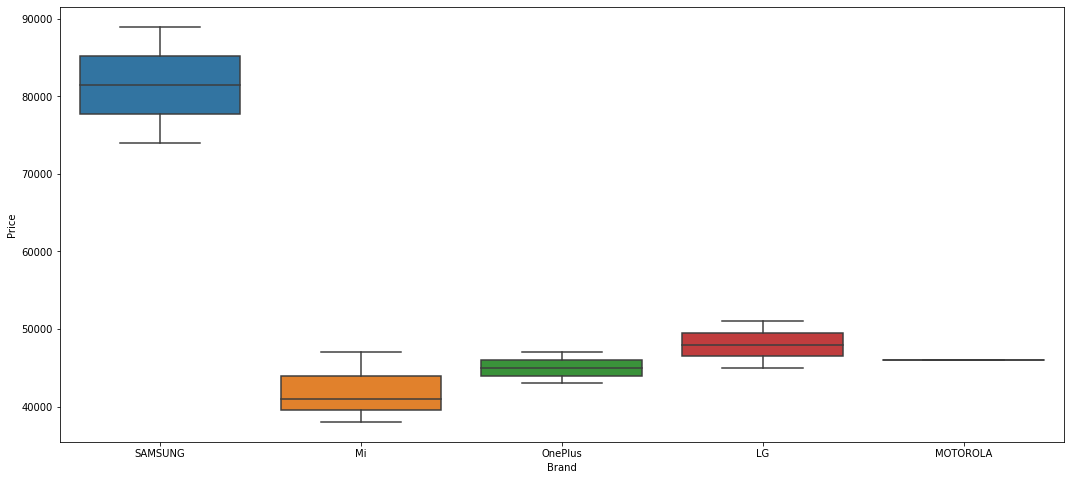

In [236]:
plt.figure(figsize=(18,8))
sns.boxplot(x = Tv_df.Brand[:10], y = Tv_df.Price);

Observations: 
- Samsung brand has the most highest price TV's.
- Motorola doesnt have much price variations.
- Mi brand has the most chepeast TV's. 

## Distribution of the Price Columns

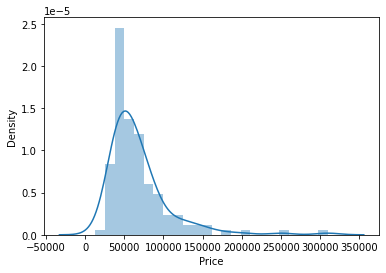

In [79]:
sns.distplot(Tv_df.Price);

- The distribution is rightly skewed.
- The mean is greater than mode.
- The upper bounds of this data set are extremely high(prices such as 300000& 350000)which make it skewed or tailed.
- Data can be converted to the normal distribution when we want to perform a regression model or for classification.

<Figure size 1080x288 with 0 Axes>

(array([31., 62., 26.,  6.,  6.,  1.,  1.,  1.,  0.,  1.]),
 array([ 12990. ,  42690.9,  72391.8, 102092.7, 131793.6, 161494.5,
        191195.4, 220896.3, 250597.2, 280298.1, 309999. ]),
 <BarContainer object of 10 artists>)

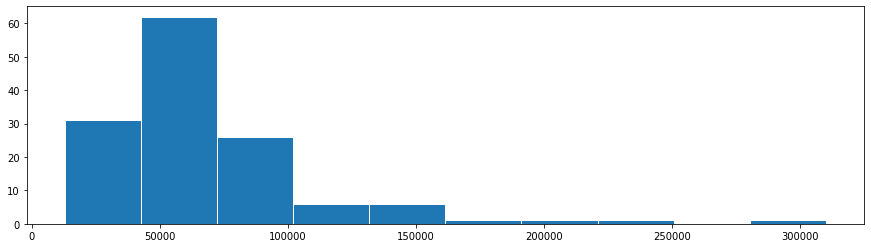

In [80]:
plt.figure(figsize=(15,4))
plt.hist(Tv_df.Price, edgecolor = 'w')

Observations :
- Higest no.of Tv's are in the price range 0-50000 and 50000-100000.
- Lowest no.of Tv products are in the price range 200000-250000 and 250000-300000.

<Figure size 1080x288 with 0 Axes>

<AxesSubplot:xlabel='Brand', ylabel='count'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'SAMSUNG'),
  Text(1, 0, 'Mi'),
  Text(2, 0, 'OnePlus'),
  Text(3, 0, 'LG'),
  Text(4, 0, 'MOTOROLA'),
  Text(5, 0, 'PHILIPS'),
  Text(6, 0, 'acer'),
  Text(7, 0, 'Vu'),
  Text(8, 0, 'Hisense'),
  Text(9, 0, 'Thomson'),
  Text(10, 0, 'Nokia'),
  Text(11, 0, 'SONY'),
  Text(12, 0, 'realme'),
  Text(13, 0, 'Blaupunkt'),
  Text(14, 0, 'TCL'),
  Text(15, 0, 'Compaq'),
  Text(16, 0, 'iFFALCON'),
  Text(17, 0, 'KODAK'),
  Text(18, 0, 'BPL'),
  Text(19, 0, 'Croma'),
  Text(20, 0, 'Akai'),
  Text(21, 0, 'JVC'),
  Text(22, 0, 'Dyanora'),
  Text(23, 0, 'Panasonic'),
  Text(24, 0, 'Adsun'),
  Text(25, 0, 'AISEN'),
  Text(26, 0, 'Salora'),
  Text(27, 0, ''),
  Text(28, 0, 'Sony'),
  Text(29, 0, 'Sharp'),
  Text(30, 0, 'INB'),
  Text(31, 0, 'Oxygen'),
  Text(32, 0, 'Lloyd'),
  Text(33, 0, 'Micromax'),
  Text(34, 0, 'Po

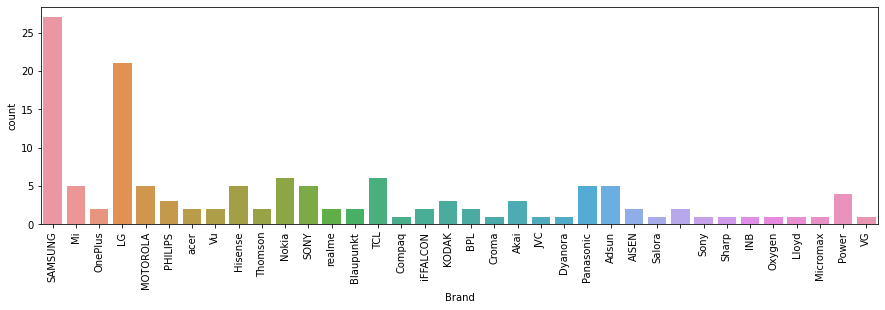

In [81]:
plt.figure(figsize=(15,4))
sns.countplot(Tv_df. Brand)
plt.xticks(rotation = 90)

Observations : 
- Samsung has the highest no.of TV products.
- Lg has the second highest no.of Tv products.

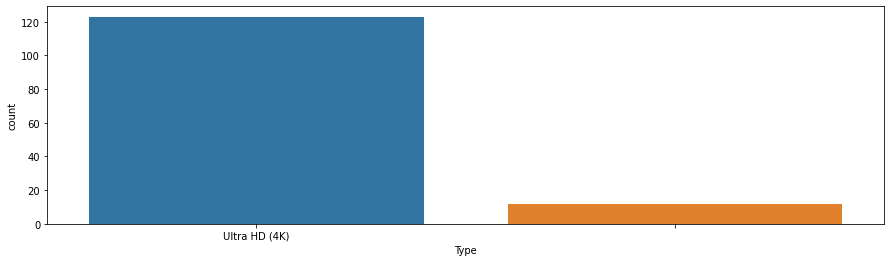

In [82]:
plt.figure(figsize=(15,4))
sns.countplot(Tv_df.Type);

Observation : 
- There are 2 types of TV available.
- The highest available type is Utlra HD(4k).
- The second type of TV is Nan.

## Question : Get the Min, Max and Mean Price of each Brand

In [83]:
Tv_df.groupby(['Brand'], as_index=False).agg({'Price':['min', 'max', 'mean']})

Brand     Price                         
                    min       max           mean
0               61000.0  138900.0   99950.000000
1       AISEN   47900.0   63900.0   55900.000000
2       Adsun   27999.0   69999.0   49999.000000
3        Akai   37840.0   55947.0   46714.333333
4         BPL   31999.0   48980.0   40489.500000
5   Blaupunkt   35999.0   40999.0   38499.000000
6      Compaq   29999.0   29999.0   29999.000000
7       Croma   36990.0   36990.0   36990.000000
8     Dyanora   40999.0   40999.0   40999.000000
9     Hisense   36999.0   63990.0   45493.600000
10        INB   39995.0   39995.0   39995.000000
11        JVC   45000.0   45000.0   45000.000000
12      KODAK   30999.0   33999.0   32999.000000
13         LG   44999.0  250000.0   91168.666667
14      Lloyd   47849.0   47849.0   47849.000000
15   MOTOROLA   42999.0   54999.0   48599.000000
16         Mi   37999.0   59999.0   46199.000000
17   Micromax   39990.0   39990.0   39990.000000
18      Nokia   42999.0   54999.0   47999.000000
19    OnePlus   42999.0   46999.0   44999.000000
20     Oxygen   39990.0   39990.0   39990.000000
21    PHILIPS   39999.0   52490.0   45829.333333
22  Panasonic   58666.0  119900.0   75642.000000
23      Power   34900.0   69990.0   49719.750000
24    SAMSUNG   54990.0  160500.0   84997.370370
25       SONY   69800.0  309999.0  126261.800000
26     Salora   39990.0   39990.0   39990.000000
27      Sharp  199990.0  199990.0  199990.000000
28       Sony  149900.0  149900.0  149900.000000
29        TCL   38999.0  120990.0   72991.500000
30    Thomson   31999.0   34999.0   33499.000000
31         VG   12990.0   12990.0   12990.000000
32         Vu   40999.0   75000.0   57999.500000
33       acer   34999.0   42999.0   38999.000000
34   iFFALCON   44999.0   56999.0   50999.000000
35     realme   41999.0   48999.0   45499.000000

## Question: Visualize the Maximun Price from Each Brand

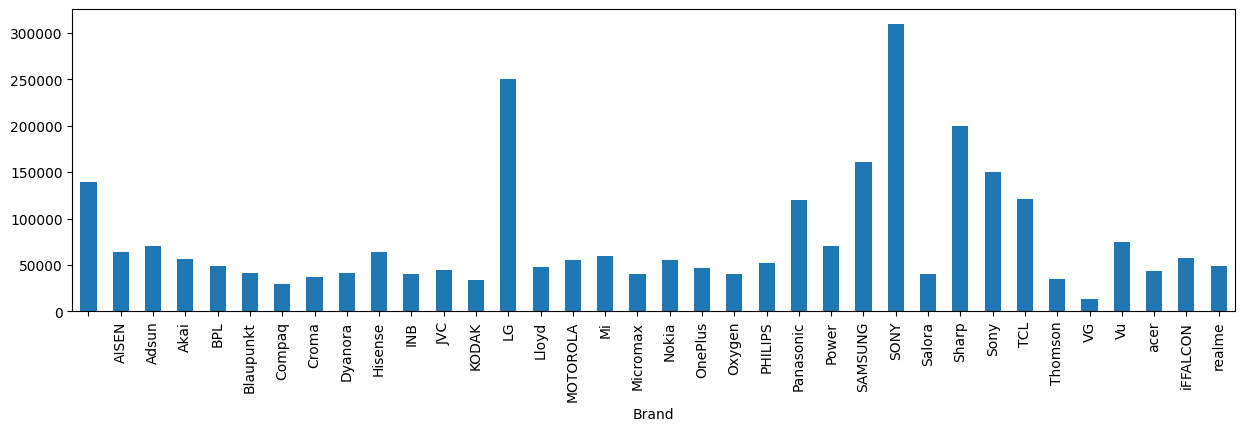

In [84]:
plt.figure(dpi = 100, figsize=(15,4))
Tv_df.groupby(['Brand'])['Price'].max().plot(kind = 'bar');

## Question: Visualize the Minimum Price from each Brand

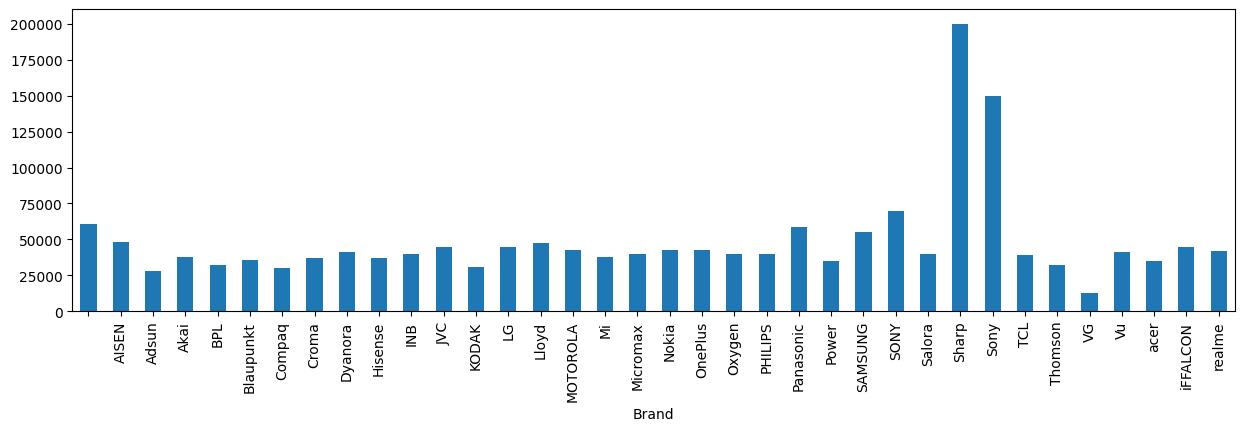

In [85]:
plt.figure(dpi = 100, figsize=(15,4))
Tv_df.groupby(['Brand'])['Price'].min().plot(kind = 'bar');

## Question: Which is the most common operating systems in TV?

<Figure size 1080x288 with 0 Axes>

<AxesSubplot:xlabel='OS_new', ylabel='count'>

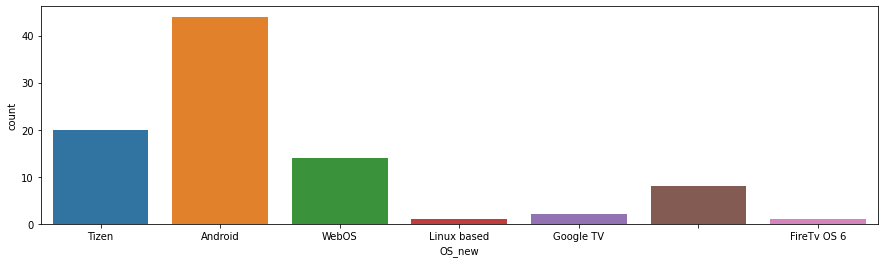

In [121]:
plt.figure(figsize=(15,4))
sns.countplot(Tv_df.OS_new[:90])

## Question : What is the highest Reference rate?

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='Ref_rate', ylabel='count'>

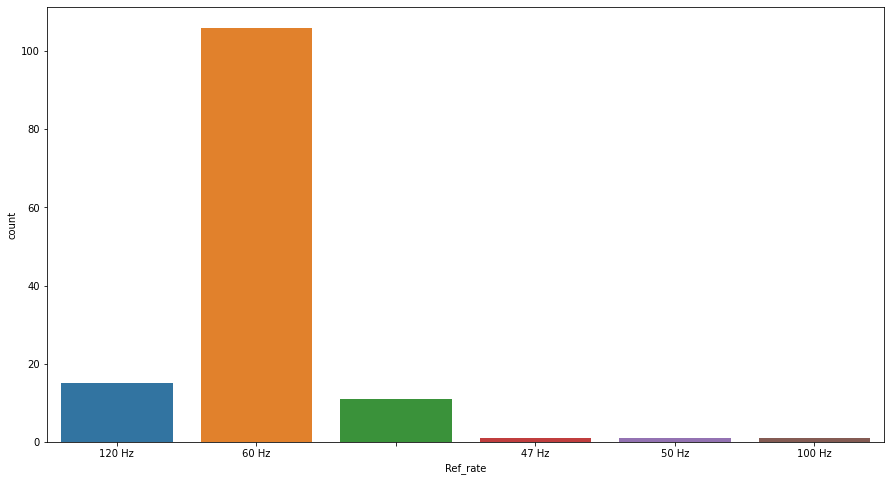

In [209]:
plt.figure(figsize=(15,8))
sns.countplot(Tv_df.Ref_rate)